In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
class BacktestBase():
    '''Base class for event-based backtesting of trading strategies.
    
    Attributes:
    ==========
    symbol: str
        TR RIC (finance instrument) to be used
    start: str
        start date for data selection
    end: str
        end date for data selection
    amount: float
        amount to be invested
    ftc: float
        fixed trading cost per trade (buy or sell)
    ptc: float
        proportional transaction cost per trade (buy or sell)
    
    
    Methods:
    ==========
    get_data:
        retrieves and prepares the base dataset
    plot_data:
        plots the closing price for the symbol
    get_date_price:
        returns the date and price for the given bar
    print_balance:
        prints out the current balance
    print_net_wealth:
        prints out the current net wealth
    place_buy_order:
        places a buy order
    place_sell_order:
        places a sell order
    close_out:
        closes out a long or short position
    '''
    
    def __init__(self, symbol, start, end, amount, ftc=0.0, ptc=0.0, verbose=True):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.initial_amount = amount
        self.amount = amount
        self.ftc = ftc
        self.ptc = ptc
        self.units = 0
        self.position = 0
        self.trades = 0
        self.verbose = verbose
        self.get_data()
    
    def get_data(self):
        ''' Retrieves and prepares data
        '''
        raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()
        raw = raw[self.symbol].to_frame()
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw['price'] / raw['price'].shift(1))
        self.data = raw.dropna()
    
    def plot_data(self, cols=None):
        ''' Plots the closing prices for symbol.
        '''
        if cols is None:
            cols = ['price']
        
        self.data['price'].plot(figsize=(10, 6), title=self.symbol)
        
    def get_date_price(self, bar):
        ''' Return date and price for the bar.
        '''
        date = str(self.data.index[bar][:10]) # Get the first 10 data points
        price = self.data.price.iloc[bar]
        return date, price
        
    def print_balance(self, bar):
        ''' Print out current cash balance info
        '''
        date, price = self.get_date_price(bar)
        print(f'{date} | current balance {self.amount:.2f}')
    
    def print_net_wealth(self, bar):
        ''' Print out current cash balance info
        '''
        date, price = self.get_date_price(bar)
        net_wealth = self.units * price + self.amount
        print(f'{date} | current net wealth {net_wealth:.2f}')
    
    def place_buy_order(self, bar, units=None, amount=None):
        ''' Place a buy order.  
        '''
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount -= (units * price) * (1 + self.ptc) + self.ftc
        self.units += units
        self.trades += 1
        if self.verbose:
            print(f'{date} | selling {units} units at {price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)
            
    def place_sell_order(self, bar, units=None, amount=None):
        date, price = self.get_date_price(bar)
        if units is None:
            units = int(amount / price)
        self.amount += (units * price) * (1 + self.ptc) + self.ftc
        self.units -= units
        self.trades += 1
        if self.verbose:
            print(f'{date} | buying {units} units at {price:.2f}')
            self.print_balance(bar)
            self.print_net_wealth(bar)
            
    def close_out(self, bar):
        date, price = self.get_date_price(bar)
        self.amount += self.units * price
        self.units = 0
        self.trades += 1
        if self.verbose:
            print(f'{date} | inventory {self.units} units at {price:.2f}')
            print('=' * 55)
        print('Final balance   [$] {:.2f}'.format(self.amount))
        perf = (self.amount-self.initial_amount) / self.initial_amount * 100
        print('Net Performance [%] {:.2f}'.format(perf))
        print('Trades Executed [#] {:.2f}'.format(self.trades))
        print('=' * 55)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-05 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2515 non-null   float64
 1   return  2515 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB
None
             price    return
Date                        
2019-12-24  284.27  0.000950
2019-12-26  289.91  0.019646
2019-12-27  289.80 -0.000380
2019-12-30  291.52  0.005918
2019-12-31  293.65  0.007280


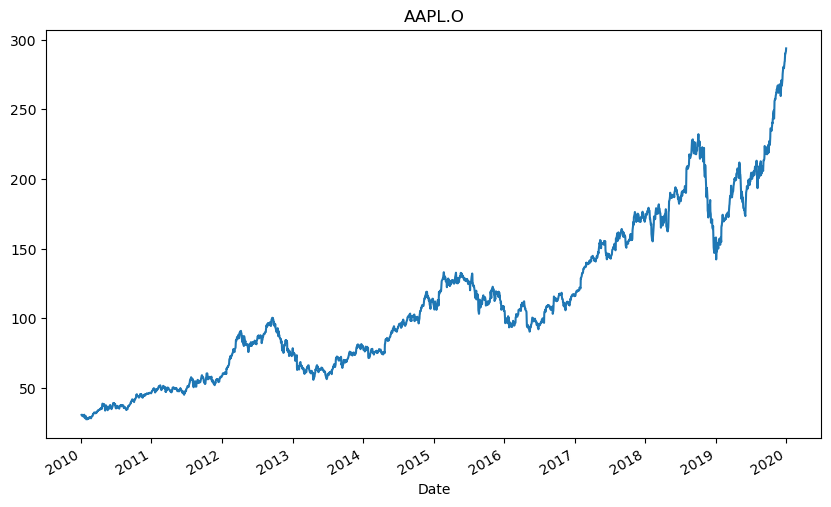

In [86]:
if __name__ == '__main__':
    bb = BacktestBase('AAPL.O', '2010-1-1', '2019-12-31', 10000)
    print(bb.data.info())
    print(bb.data.tail())
    bb.plot_data()

In [75]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [76]:
raw = raw['AAPL.O'].to_frame()
raw = raw.loc[raw.index[500]:raw.index[1000]]
# raw = raw.to_frame()
raw.rename(columns={'AAPL.O': 'price'}, inplace=True)
raw['return'] = np.log(raw['price'] / raw['price'].shift(1))

In [78]:
raw.index

DatetimeIndex(['2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30',
               '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10',
               ...
               '2013-12-10', '2013-12-11', '2013-12-12', '2013-12-13',
               '2013-12-16', '2013-12-17', '2013-12-18', '2013-12-19',
               '2013-12-20', '2013-12-23'],
              dtype='datetime64[ns]', name='Date', length=501, freq=None)